In [1]:
!pip install import-ipynb
import import_ipynb
#from __future__ import print_function
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
!pip install torchsummary
from torchsummary import summary
from tqdm import tqdm
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from torchvision.transforms import ToPILImage
from torchvision.utils import save_image
import os
from PIL import Image
from datetime import datetime
%load_ext autoreload
%autoreload 2

  Created wheel for import-ipynb: filename=import_ipynb-0.1.3-cp36-none-any.whl size=2976 sha256=fe32d422b16ae974e501e0d9f749c3ea9adad2c1ae17c02682c9e5151eb658af
  Stored in directory: /root/.cache/pip/wheels/b4/7b/e9/a3a6e496115dffdb4e3085d0ae39ffe8a814eacc44bbf494b5
Successfully built import-ipynb


In [2]:
print("Current Date/Time: ", datetime.now())

Current Date/Time:  2020-03-17 21:07:09.159336


In [0]:
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")

In [4]:
from google.colab import drive
drive.mount('/content/gdrive') 

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [5]:
%cd "/content/gdrive/My Drive/Colab Notebooks/CNN_Utility"

/content/gdrive/My Drive/Colab Notebooks/CNN_Utility


In [0]:
from dataloaders import train_test_dataloaders,transformations, AlbumentationWrapper
#from models import BasicBlock,Bottleneck,ResNet,ResNet18,Net,model_params,model_params
from graphs_and_other_utility_functions import plot,save_model,get_lr
from train_test import train,test
from QuizDNN import QuizModel,model_params

In [0]:
train_transforms , test_transforms=AlbumentationWrapper('train'), AlbumentationWrapper('test')

In [8]:
trainloader, testloader = train_test_dataloaders(1, 128, 10, train_transforms , test_transforms)

CUDA Available? True
Files already downloaded and verified
Files already downloaded and verified


In [0]:
model =  QuizModel(1.0).to(device)
optimizer = optim.SGD(model.parameters(), lr=0.1, momentum=0.9, weight_decay=5e-4)
scheduler = torch.optim.lr_scheduler.MultiStepLR(optimizer, milestones=[10], gamma=0.1)
epochs=15
input_size=(3,32,32)

  0%|          | 0/391 [00:00<?, ?it/s]

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 32, 32]             864
              ReLU-2           [-1, 32, 32, 32]               0
       BatchNorm2d-3           [-1, 32, 32, 32]              64
            Conv2d-4           [-1, 32, 32, 32]              96
            Conv2d-5           [-1, 64, 32, 32]          18,432
              ReLU-6           [-1, 64, 32, 32]               0
       BatchNorm2d-7           [-1, 64, 32, 32]             128
            Conv2d-8           [-1, 64, 32, 32]           2,048
            Conv2d-9           [-1, 64, 32, 32]           2,048
        MaxPool2d-10           [-1, 64, 16, 16]               0
           Conv2d-11           [-1, 64, 16, 16]          36,864
             ReLU-12           [-1, 64, 16, 16]               0
      BatchNorm2d-13           [-1, 64, 16, 16]             128
           Conv2d-14           [-1, 64,

Loss=1.0967243909835815 Batch_id=390 Accuracy=48.56: 100%|██████████| 391/391 [00:48<00:00,  8.04it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0091, Accuracy: 5911/10000 (59.11%)

EPOCH: 1 LR: 0.1 


Loss=0.9481483697891235 Batch_id=390 Accuracy=63.21: 100%|██████████| 391/391 [00:48<00:00,  8.00it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0078, Accuracy: 6571/10000 (65.71%)

EPOCH: 2 LR: 0.1 


Loss=0.7990828156471252 Batch_id=390 Accuracy=68.74: 100%|██████████| 391/391 [00:49<00:00,  7.89it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0071, Accuracy: 6874/10000 (68.74%)

EPOCH: 3 LR: 0.1 


Loss=0.8441683650016785 Batch_id=390 Accuracy=71.57: 100%|██████████| 391/391 [00:48<00:00,  8.05it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0066, Accuracy: 7123/10000 (71.23%)

EPOCH: 4 LR: 0.1 


Loss=0.5388503074645996 Batch_id=390 Accuracy=74.05: 100%|██████████| 391/391 [00:48<00:00,  7.99it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0062, Accuracy: 7293/10000 (72.93%)

EPOCH: 5 LR: 0.1 


Loss=0.7663085460662842 Batch_id=390 Accuracy=75.96: 100%|██████████| 391/391 [00:48<00:00,  7.99it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0066, Accuracy: 7282/10000 (72.82%)

EPOCH: 6 LR: 0.1 


Loss=0.6261295080184937 Batch_id=390 Accuracy=76.68: 100%|██████████| 391/391 [00:49<00:00,  7.85it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0069, Accuracy: 7084/10000 (70.84%)

EPOCH: 7 LR: 0.1 


Loss=0.7377532124519348 Batch_id=390 Accuracy=78.15: 100%|██████████| 391/391 [00:48<00:00,  8.02it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0062, Accuracy: 7439/10000 (74.39%)

EPOCH: 8 LR: 0.1 


Loss=0.4955406188964844 Batch_id=390 Accuracy=78.53: 100%|██████████| 391/391 [00:48<00:00,  8.01it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0067, Accuracy: 7313/10000 (73.13%)

EPOCH: 9 LR: 0.1 


Loss=0.43387240171432495 Batch_id=390 Accuracy=78.92: 100%|██████████| 391/391 [00:48<00:00,  8.05it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0058, Accuracy: 7526/10000 (75.26%)

EPOCH: 10 LR: 0.010000000000000002 


Loss=0.5139086246490479 Batch_id=390 Accuracy=84.12: 100%|██████████| 391/391 [00:49<00:00,  7.89it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0044, Accuracy: 8198/10000 (81.98%)

EPOCH: 11 LR: 0.010000000000000002 


Loss=0.4720228314399719 Batch_id=390 Accuracy=85.70: 100%|██████████| 391/391 [00:48<00:00,  8.07it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0045, Accuracy: 8164/10000 (81.64%)

EPOCH: 12 LR: 0.010000000000000002 


Loss=0.2603823244571686 Batch_id=390 Accuracy=86.34: 100%|██████████| 391/391 [00:48<00:00,  7.99it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0044, Accuracy: 8215/10000 (82.15%)

EPOCH: 13 LR: 0.010000000000000002 


Loss=0.6010488867759705 Batch_id=390 Accuracy=86.85: 100%|██████████| 391/391 [00:49<00:00,  7.96it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0043, Accuracy: 8291/10000 (82.91%)

EPOCH: 14 LR: 0.010000000000000002 


Loss=0.25589147210121155 Batch_id=390 Accuracy=87.44: 100%|██████████| 391/391 [00:50<00:00,  7.81it/s]



Test set: Average loss: 0.0042, Accuracy: 8287/10000 (82.87%)



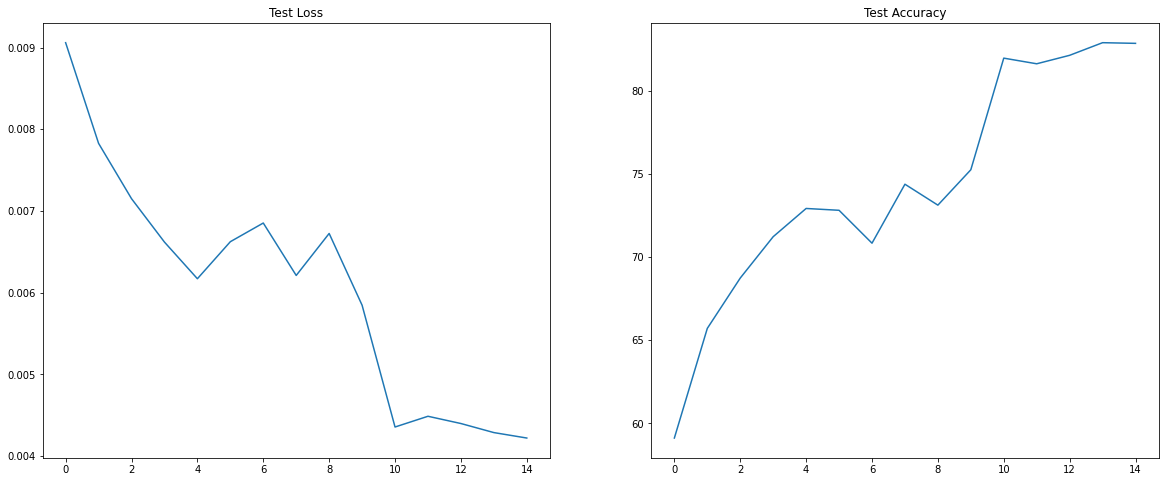

In [10]:
train_losses_without_L1_L2 = []
test_losses_without_L1_L2 = []
train_acc_without_L1_L2 = []
test_acc_without_L1_L2 = []
model_params(model, input_size,device)  

for epoch in range(epochs):
    print("EPOCH: %s LR: %s " % (epoch, get_lr(optimizer)))
    train(model, device, trainloader, optimizer, epoch, False, train_acc_without_L1_L2, train_losses_without_L1_L2)
    test(model, device, testloader, test_acc_without_L1_L2, test_losses_without_L1_L2, {})
    scheduler.step()
plot(train_losses_without_L1_L2,train_acc_without_L1_L2, test_losses_without_L1_L2, test_acc_without_L1_L2, 'without L1 and L2')